<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, we must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve our ability to implement algorithms for Multi-Class Classification. Thus, we will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, we will try to understand the dataset column by column using pandas module. We will do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

We will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model we choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
#conda install -c conda-forge xgboost

In [2]:
#!pip install xgboost==0.90

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [4]:
import sklearn
sklearn.__version__

'1.1.3'

In [5]:
import xgboost
xgboost.__version__

'1.5.0'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
female = pd.read_csv("ANSUR II FEMALE Public.csv")
male = pd.read_csv("ANSUR II MALE Public (1).csv",  encoding = "latin-1")

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [6]:
print(male.shape)
print(female.shape)

(4082, 108)
(1986, 108)


In [11]:
df_female.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [7]:
df0 = pd.concat([male,female], axis=0, ignore_index=True)

In [8]:
df=df0.copy()
df.head(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [14]:
df.shape

(6068, 108)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [17]:
df.isnull().sum().any()

True

In [18]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [10]:
df.describe(include=[object]).T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [11]:
for i in df.columns:
    if df[i].dtype=="object":
        print("*"*15)
        print(i)
        print()
        print(df[i].unique())

***************
Gender

['Male' 'Female']
***************
Date

['4-Oct-10' '12-Oct-10' '6-Oct-10' '7-Oct-10' '13-Oct-10' '14-Oct-10'
 '15-Oct-10' '18-Oct-10' '19-Oct-10' '20-Oct-10' '21-Oct-10' '22-Oct-10'
 '25-Oct-10' '26-Oct-10' '27-Oct-10' '28-Oct-10' '29-Oct-10' '2-Nov-10'
 '4-Nov-10' '17-Nov-10' '16-Nov-10' '18-Nov-10' '19-Nov-10' '22-Nov-10'
 '23-Nov-10' '29-Nov-10' '30-Nov-10' '1-Dec-10' '2-Dec-10' '3-Dec-10'
 '6-Dec-10' '7-Dec-10' '10-Dec-10' '8-Dec-10' '13-Dec-10' '14-Dec-10'
 '5-Jan-11' '7-Jan-11' '10-Jan-11' '11-Jan-11' '12-Jan-11' '13-Jan-11'
 '19-Jan-11' '18-Jan-11' '20-Jan-11' '21-Jan-11' '27-Jan-11' '28-Jan-11'
 '30-Jan-11' '31-Jan-11' '7-Feb-11' '8-Feb-11' '9-Feb-11' '11-Feb-11'
 '15-Feb-11' '16-Feb-11' '17-Feb-11' '22-Feb-11' '24-Feb-11' '25-Feb-11'
 '9-Mar-11' '11-Mar-11' '14-Mar-11' '15-Mar-11' '16-Mar-11' '17-Mar-11'
 '18-Mar-11' '22-Mar-11' '21-Mar-11' '24-Mar-11' '25-Mar-11' '26-Mar-11'
 '29-Mar-11' '30-Mar-11' '31-Mar-11' '8-Apr-11' '11-Apr-11' '12-Apr-11'
 '13-

In [12]:
df_object = df.select_dtypes(include ="object").head()

In [13]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

Gender                        : 2
Date                          : 253
Installation                  : 12
Component                     : 3
Branch                        : 3
PrimaryMOS                    : 285
SubjectsBirthLocation         : 152
Ethnicity                     : 209
WritingPreference             : 3


In [14]:
is_null =df.isnull().sum()

In [15]:
percentage_null = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null'])
percentage_null

,percentage_null
subjectid,32.729071
abdominalextensiondepthsitting,0.000000
acromialheight,0.000000
acromionradialelength,0.000000
anklecircumference,0.000000
axillaheight,0.000000
balloffootcircumference,0.000000
balloffootlength,0.000000
biacromialbreadth,0.000000
bicepscircumferenceflexed,0.000000


In [16]:
(pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null'])).nlargest(4,"percentage_null")

,percentage_null
Ethnicity,76.582070
SubjectId,67.270929
subjectid,32.729071
abdominalextensiondepthsitting,0.000000


In [17]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null.nlargest(4,"percentage_null")


,Columns,0,percentage_null
102,Ethnicity,4647,76.582070
108,SubjectId,4082,67.270929
0,subjectid,1986,32.729071
1,abdominalextensiondepthsitting,0,0.000000


In [18]:
df.drop(['SubjectId', 'subjectid'], axis=1, inplace=True)

In [19]:
df['Ethnicity'].value_counts(dropna=False, normalize=True)

NaN                                                   0.765821
Mexican                                               0.058833
Puerto Rican                                          0.030158
Caribbean Islander                                    0.020435
Filipino                                              0.011042
Cherokee                                              0.010712
Korean                                                0.008734
Dominican                                             0.005274
Chinese                                               0.004285
Japanese                                              0.003626
Vietnamese                                            0.003461
Colombian                                             0.002802
Cuban                                                 0.002802
Arab or Middle Eastern                                0.002802
Salvadoran                                            0.002637
East/Asian Indian                                     0

In [20]:
df.drop(['Ethnicity'], axis=1, inplace=True)

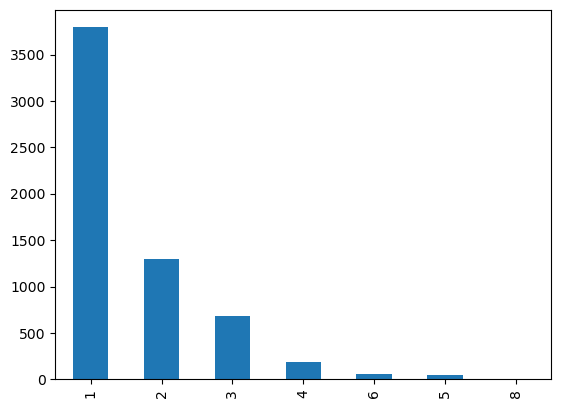

In [21]:
df['DODRace'].value_counts().plot(kind='bar');

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


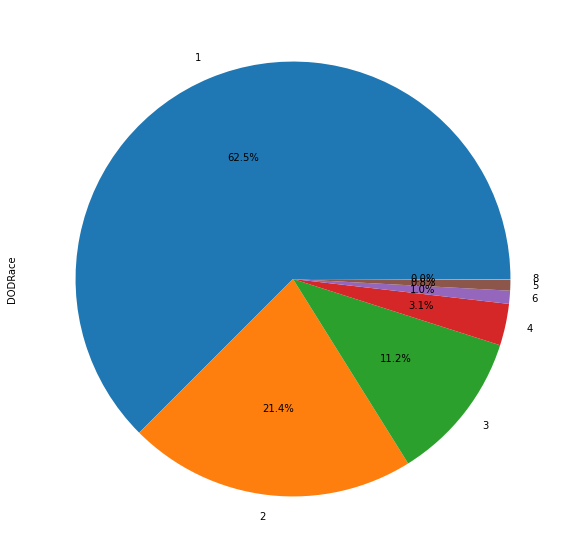

In [19]:
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [22]:
df_object

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand


<AxesSubplot:ylabel='Component,DODRace'>

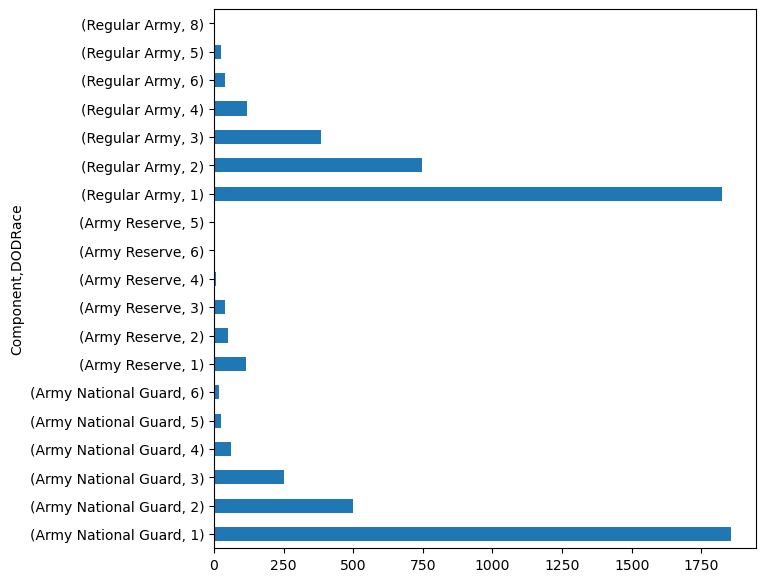

In [23]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(7,7))

In [24]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          0.771995
                                             2          0.097893
                                             3          0.091698
                                             4          0.022305
                                             5          0.011152
                                             6          0.004957
                     Combat Service Support  1          0.643509
                                             2          0.218947
                                             3          0.099649
                                             4          0.023158
                                             6          0.007719
                                             5          0.007018
                     Combat Support          1          0.661765
                                             2          0.226891
                                     

In [25]:
df.drop(['Date', "Installation", "Component", "Branch", 'PrimaryMOS'], inplace = True, axis = 1)

In [26]:
df[["weightkg","Heightin","Weightlbs"]]
    

,weightkg,Heightin,Weightlbs
0,815,71,180
1,726,68,160
2,929,68,205
3,794,66,175
4,946,77,213
...,...,...,...
6063,832,67,180
6064,717,63,150
6065,762,66,168
6066,632,63,133


In [27]:
df.isnull().sum().any()

False

In [28]:
df.drop(["Heightin","Weightlbs"], axis=1, inplace=True)

In [29]:
df["SubjectNumericRace"].value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [30]:
df.drop("SubjectNumericRace", axis=1, inplace=True)

In [31]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [30]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [32]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [33]:
df.shape

(6068, 98)

In [34]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [35]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [36]:
df2 = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [37]:
df2.reset_index(drop=True, inplace=True)

In [38]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

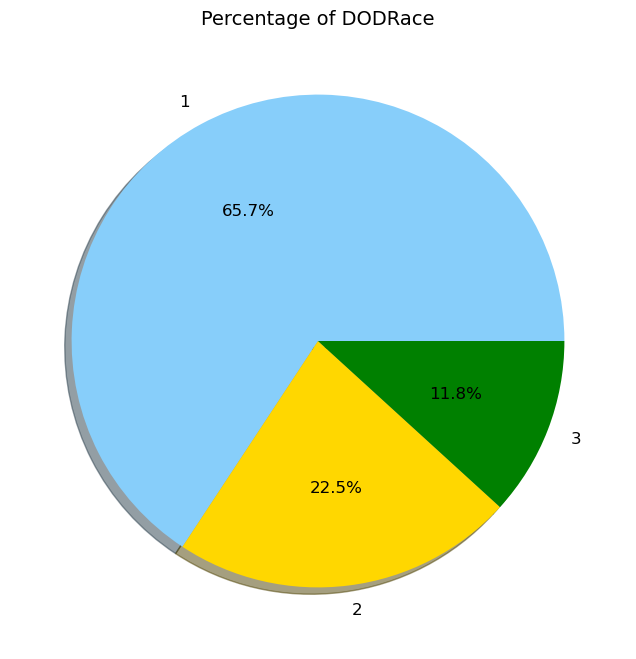

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(x=df2.DODRace.value_counts().values,
       labels=['1', '2', '3'],
       autopct='%.1f%%',
       colors=['lightskyblue', 'gold', 'green'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of DODRace", fontdict={'fontsize': 14})
plt.show()

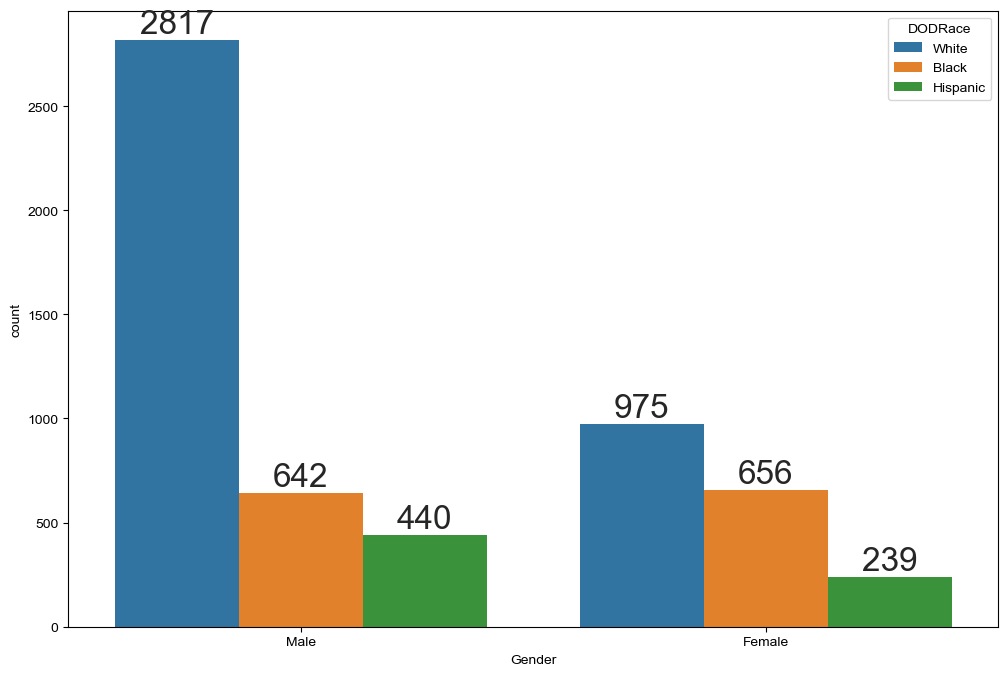

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="Gender", hue='DODRace', data=df2)
sns.set(font_scale=2)
for container in ax.containers:
    ax.bar_label(container);

<AxesSubplot:>

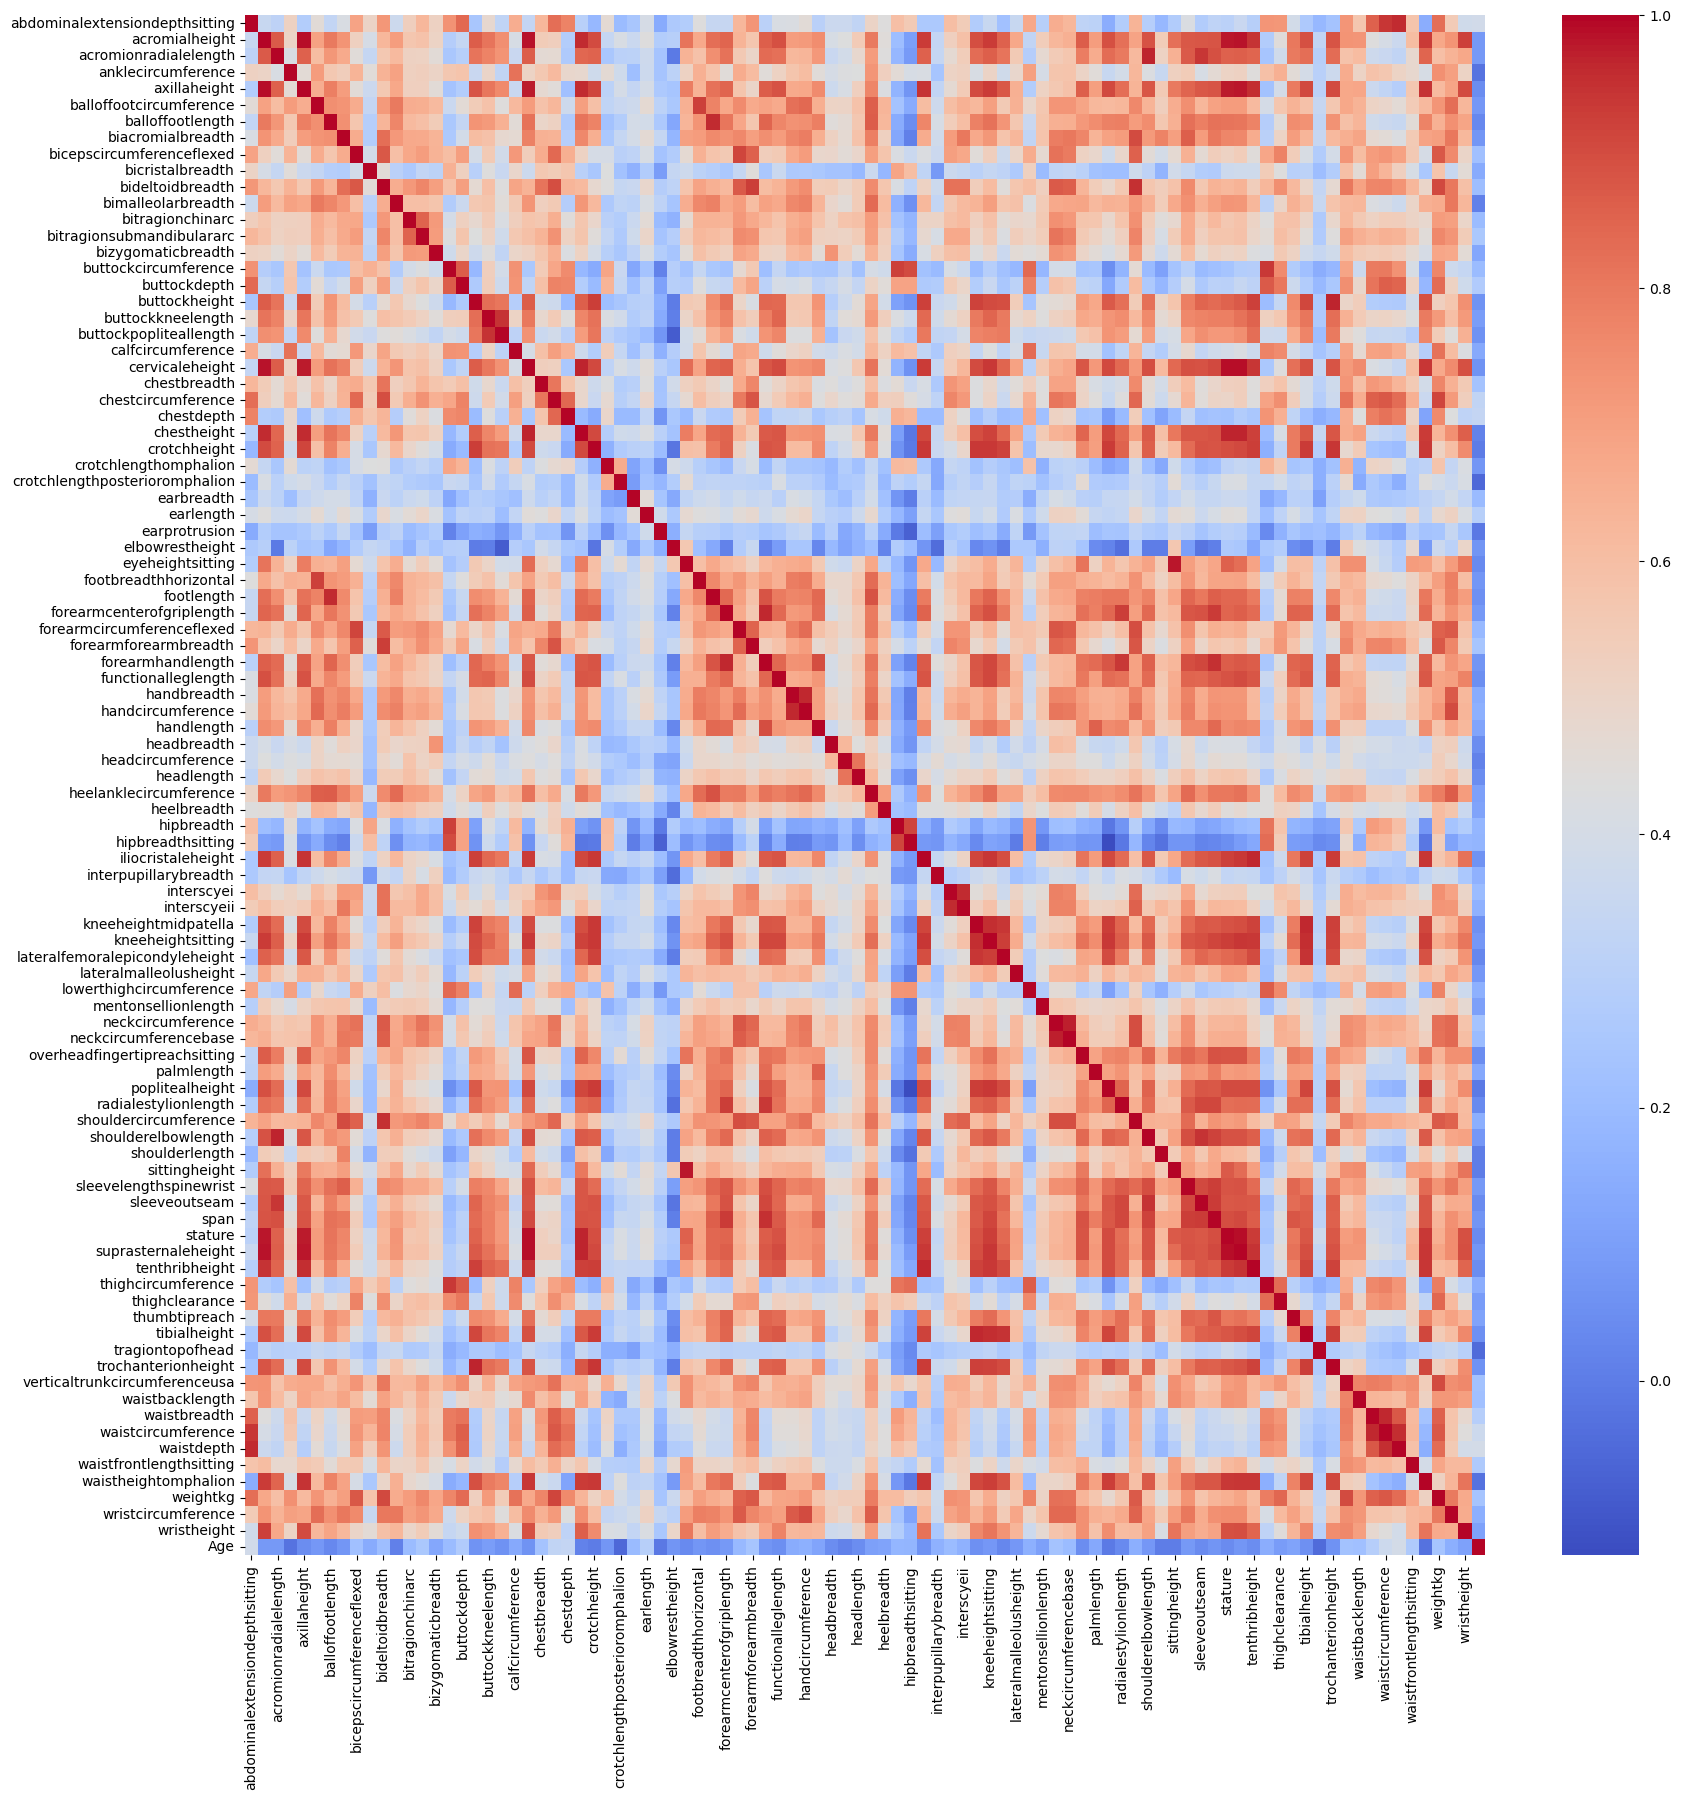

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), cmap ="coolwarm")

In [45]:
# There is multicollinearity among the dark red features. 
# But we will not deal with the problem of multicollinearity. 
# Because Logistic Regression will solve this problem with regularization in the background. 
# Multicollinearity has a lot of effect on feature importance. 
# We will not be able to get feature importance in SVC model. 
# So multicollinearity is not a problem for us:

In [42]:
import plotly 
from plotly.express import scatter_3d
from ipywidgets import interact

In [43]:
def scatter_3d_plotter(feature1, feature2 ,feature3):
    scatter_3d(data_frame = df2 , x=feature1, y=feature2, z=feature3, color = "DODRace").show()

In [44]:
interact(scatter_3d_plotter, feature1 = df2.select_dtypes(np.number),feature2 = df2.select_dtypes(np.number),feature3 = df2.select_dtypes(np.number))

interactive(children=(Dropdown(description='feature1', options=('abdominalextensiondepthsitting', 'acromialhei…

<function __main__.scatter_3d_plotter(feature1, feature2, feature3)>

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [39]:
X = df2.drop(columns= ["DODRace"])
y = df2.DODRace

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [41]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [42]:
# Meaning of vanilla model; It is to establish a model with default values.

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())


In [45]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

# Pipeline is definitely used when performing scale operations. 
# To prevent data leakage that will occur in Cross Validation and Grid Search.

In [46]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [ ]:
# There does not appear to be any imbalance between the Train and the Test set.
# Work on improving your Precision, Recall and F1 scores for the Hispanic class.

In [47]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [48]:
# Reset the model first in the Cross Validation operation.
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.490303
train_precision_Hispanic    0.533376
test_recall_Hispanic        0.773333
train_recall_Hispanic       0.838958
test_f1_Hispanic            0.599420
train_f1_Hispanic           0.652122
dtype: float64

### Logistic Model GridsearchCV

In [49]:
# The variable created because our aim is to increase the Recall score of the Hi

recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [50]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [51]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [52]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [53]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [54]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [55]:
log_model_grid.best_index_

7

In [56]:
pd.DataFrame(log_model_grid.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773333
mean_train_score    0.838958
Name: 7, dtype: object

In [57]:
log_model_grid.best_score_

0.7733333333333333

In [58]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



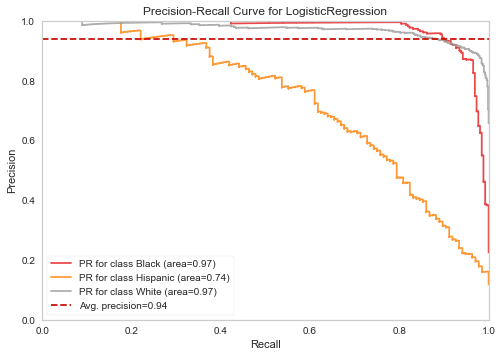

In [59]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# Look at Precision Recall Curve as it is an unstable data set.
# Overall success in detecting Hispanics is 74%.

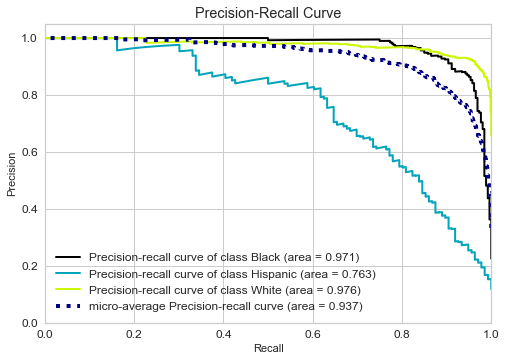

In [60]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [61]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.762864017152957

In [62]:
viz.score_#["Hispanic"]

{'Black': 0.9739657452093798,
 'Hispanic': 0.7355773451748437,
 'White': 0.971430770101255,
 'micro': 0.9382542466150254}

In [63]:
viz.score_["Hispanic"]

0.7355773451748437

In [64]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Lojistic Regression solver "liblenear" for small dataset

In [65]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                    random_state=101, solver="liblinear", penalty="l1"))]

pipe_log_model_libl = Pipeline(steps=operations)

In [66]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[245   4  11]
 [  5  96  35]
 [ 18  34 706]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       260
    Hispanic       0.72      0.71      0.71       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 975   19   44]
 [  29  386  128]
 [  43  146 2845]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1038
    Hispanic       0.70      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
# Hispanic scores are lower than the score above, but precision, 
# recall and f1 scores are very balanced with each other. 
# This model can be presented to the customer as balanced scores.

In [67]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                                    random_state=101,solver="liblinear", penalty="l1"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.660595
train_precision_Hispanic    0.700724
test_recall_Hispanic        0.635118
train_recall_Hispanic       0.702682
test_f1_Hispanic            0.646215
train_f1_Hispanic           0.701684
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [68]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [69]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [ ]:
# SVC scores are close to Logistic Regression scores.

In [70]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.450808
train_precision_Hispanic    0.495061
test_recall_Hispanic        0.760404
train_recall_Hispanic       0.835275
test_f1_Hispanic            0.565226
train_f1_Hispanic           0.621644
dtype: float64

###  SVC Model GridsearchCV

In [71]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [72]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [73]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [74]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [75]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [76]:
svm_model_grid.best_index_

3

In [77]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.760404
mean_train_score    0.835275
Name: 3, dtype: object

In [78]:
svm_model_grid.best_score_

# Grid Search found the best score as 0.76. 
# A score close to the score we achieved with Cross Validation above:

0.7604040404040403

In [79]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

# After the Grid Search process, the precision value of the Hispanic class increased,
# other scores did not change much. 
# The Logistic model approaches its scores:

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



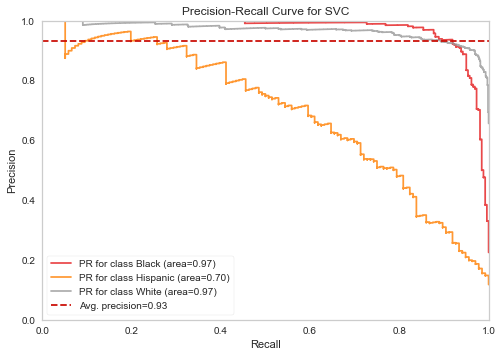

In [80]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

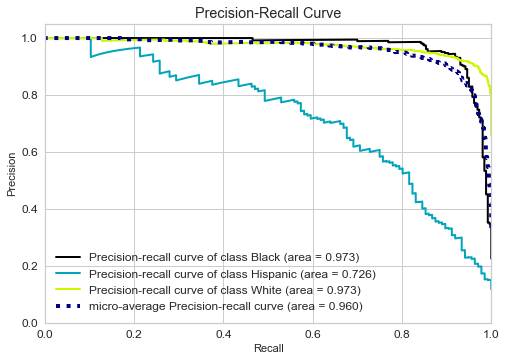

In [81]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

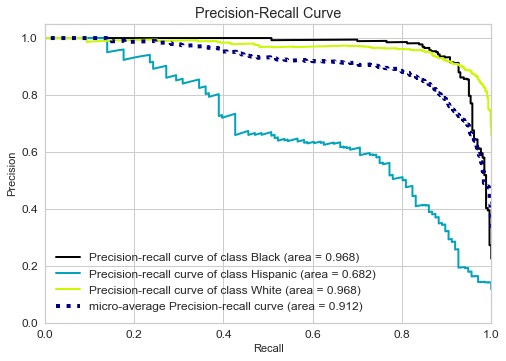

In [82]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [83]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [84]:
cat
# Assign object features to a variable for OrdinalEncoder.

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [85]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

### Vanilla RF Model

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [87]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [ ]:
# Although we made the balance, the recall and f1 scores of the test set of the Hispanic class turned out to be very bad. 
# The scores in the train set are 100%, the test set scores are very bad. 
# There is an overfitting condition. In the next steps we will try to improve 

In [88]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.777143
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.025807
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.049538
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [89]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [90]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [91]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [92]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [93]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [94]:
rf_grid_model.best_index_

0

In [95]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.609582
mean_train_score    0.645955
Name: 0, dtype: object

In [96]:
rf_grid_model.best_score_

0.6095820591233435

In [97]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[174  50  36]
 [ 16  76  44]
 [ 91 244 423]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.21      0.56      0.30       136
       White       0.84      0.56      0.67       758

    accuracy                           0.58      1154
   macro avg       0.56      0.60      0.54      1154
weighted avg       0.72      0.58      0.62      1154


Train_Set
[[ 702  204  132]
 [  45  346  152]
 [ 246 1105 1683]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.69      1038
    Hispanic       0.21      0.64      0.31       543
       White       0.86      0.55      0.67      3034

    accuracy                           0.59      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.59      0.64      4615



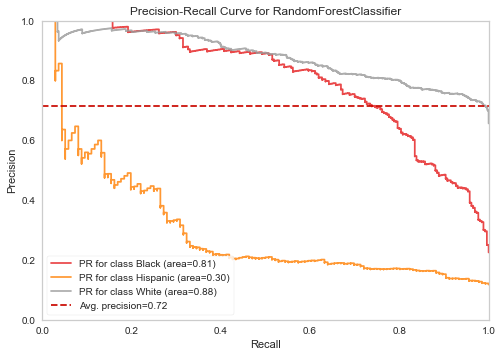

In [98]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [99]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [100]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

[20:55:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [101]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [102]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train
comp.head()

,weights,label
893,2.833026,Hispanic
196,0.507031,White
3821,0.507031,White
3206,0.507031,White
4500,1.482017,Black


In [103]:
comp.groupby("label")["weights"].value_counts()

label     weights 
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: weights, dtype: int64

In [104]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is th

[20:55:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [105]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.88       260
    Hispanic       0.74      0.47      0.58       136
       White       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [106]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[20:55:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:41] WARNI

test_precision_Hispanic     0.694862
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.427234
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.528032
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [107]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [108]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic,
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [109]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

[20:56:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample...
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [110]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=0.8,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [111]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

In [112]:
xgb_grid_model.best_index_

12

In [113]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.561774
mean_train_score    0.621083
Name: 12, dtype: object

In [114]:
xgb_grid_model.best_score_

0.5617737003058105

In [115]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[190  42  28]
 [ 20  70  46]
 [106 188 464]]
              precision    recall  f1-score   support

       Black       0.60      0.73      0.66       260
    Hispanic       0.23      0.51      0.32       136
       White       0.86      0.61      0.72       758

    accuracy                           0.63      1154
   macro avg       0.57      0.62      0.57      1154
weighted avg       0.73      0.63      0.66      1154


Train_Set
[[ 753  165  120]
 [  79  323  141]
 [ 293  776 1965]]
              precision    recall  f1-score   support

       Black       0.67      0.73      0.70      1038
    Hispanic       0.26      0.59      0.36       543
       White       0.88      0.65      0.75      3034

    accuracy                           0.66      4615
   macro avg       0.60      0.66      0.60      4615
weighted avg       0.76      0.66      0.69      4615



In [116]:
#!pip install scikit-plot

In [117]:
#conda install -c conda-forge scikit-plot

[20:56:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


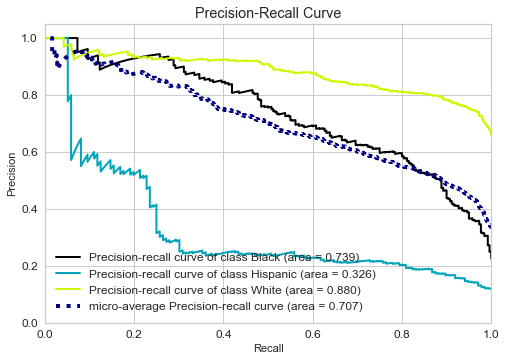

In [118]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [119]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.32636838318521066

In [120]:
y_test_dummies

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [121]:
y_pred_proba

array([[0.24098502, 0.3198164 , 0.43919855],
       [0.29796344, 0.32085067, 0.3811859 ],
       [0.25836837, 0.43920255, 0.30242908],
       ...,
       [0.3535339 , 0.34918946, 0.29727665],
       [0.34017769, 0.36338475, 0.2964375 ],
       [0.2715865 , 0.29061675, 0.43779668]], dtype=float32)

In [122]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

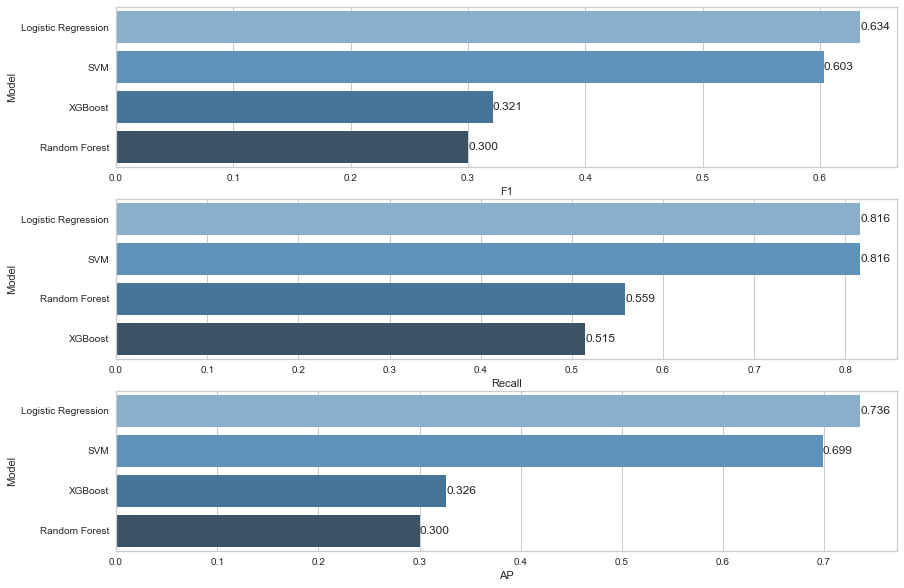

In [123]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [ ]:
# In f1 score and recall, Logistic model and SVM scores are close to each other; 
# When we look at the overall performance (AP), we see that the Logistic Regression is higher. 
# Therefore, it makes sense to choose the Logistic Model. 
# Even if the scores are the same, choosing an SVM model would not make sense. 
# Because in this model, the working cost is high and we cannot do feature importance. 
# We can make feature importance in Logistic Regression (Ridge-Lasso).

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [124]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [125]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [126]:
X[X.Gender=="Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [127]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human

# I took the average values of all the features below and gave them to the model 
# so that it could make predictions as if they belonged to a human.

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [128]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [129]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,California,30.172352,Right hand


In [130]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['Hispanic'], dtype=object)

In [131]:
y[201]

'Hispanic'

In [132]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [ ]:
# matthews_corrcoef ------> Correlation between the actual values we get and the predicted values.

# matthews_corrcoe, cohen_kappa_score ------> when we got our scores in eval_metric, we saw that the 
# accuracy, macro, weighted and class scores were all different from each other. 
# These are metrics that allow us to get an overall score based on the scores of all of them. 
# They are used in unbalanced datasets.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [133]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7831660810065028

In [134]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7739520999384765

In [ ]:
# The matthews_corrcoef score was 78% and the cohen_kappa_score calculated an overall model performance of 77%. 
# We can look at these scores instead of accuracy, recall, f1 score or other scores. 
# These scores we got are almost the same as the score we got in the general performance of the model (log_AP) above. 
# These scores can also be looked at in unbalanced data sets.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [135]:
#!pip install imblearn

In [136]:
#conda install -c conda-forge imbalanced-learn

In [ ]:
# Smote -----> In unbalanced data sets, the number of observations of other classes is equal to
# whichever class the largest number of observations in the data belongs to. 
# For example, the largest number of observations in our data was White = 3034. 
# When the Smote operation is applied, the number of observations in other classes is also equated to this. 
# It should be tried for unbalanced datasets:

In [137]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
# over_sampling -----> Equal the number of observations in all classes to the number of observations in the largest class. (default value)

# under_sampling -----> Equal the number of observations in all classes to the number of observations in the smallest class. 
#                       If we do this, the scores will be very good, which is something we do not want.

# Smote is only applied to the Train set, and the number of observations is not increased in the test set. 
# If we increase the number of observations in the test set, the scores will be ve

In [138]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [139]:
X_train_ohe = column_trans.fit_transform(X_train)

In [140]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [141]:
X_over.shape

(9102, 227)

In [142]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [143]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [144]:
X_under.shape

(1629, 227)

In [145]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [146]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# Both over_sampling and under_sampling create noise in the data, we don't want both. 
# We specify which class we want to increase or decrease using the sampling_strategy, 

In [147]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

# We cannot use the pipeline of the sklearn library here because only fit, 
# transform and predict operations can be applied to it. 
# But here our aim is to do over_sampling and under_sampling and we can do this wit

In [148]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [149]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [150]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train) #X_resampled_over, y_resampled_over

In [151]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [152]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [153]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [154]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [ ]:
# In steps, first increase the number of related classes; Then we said reduce the number of related classes. 
# We then defined it in the pipeline and then applied the action by doing fit_resample(X_train, y_train). 
# Class numbers came to the desired value.

## Logistic Regression Over/Under Sampling

In [155]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [156]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000, random_state=101))] #("scaler", MinMaxScaler())
                                                                             #Don't use class_weight="balanced"

In [157]:
smote_pipeline = imbpipeline(steps=operations)

In [158]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [159]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237   8  15]
 [  5  96  35]
 [ 15  39 704]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       260
    Hispanic       0.67      0.71      0.69       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.84      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 945   29   64]
 [  23  386  134]
 [  24  148 2862]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93      1038
    Hispanic       0.69      0.71      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [ ]:
# We saw our Hispanic scores decrease on both the Train and Test set. 
# In other words, the Smote process could not improve our scores in this data.

In [160]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.625356
train_precision_Hispanic    0.694099
test_recall_Hispanic        0.648215
train_recall_Hispanic       0.718030
test_f1_Hispanic            0.635539
train_f1_Hispanic           0.705832
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# Shap; When making a prediction, it shows how much each feature contributes to the prediction. 
# For example, in this data, we select the features of the Hispanic class. 
# If we make a feature selection through them, our scores may be better with less number of observations. 
# It's a different process than the feature importance we did before.

In [161]:
# !pip install shap

In [162]:
# While applying the model with Shap, if there is a problem with the class,
# we need to choose the model with the best score for that class. 
# That's why we defined the parameters in Logistic where we get the best results for the Hispanic class. 
# Since we're going to feature selection, we need to make sure the forecasts are good. 
# For example, we could not use XGBoost and Random Forest models here
# because we know that their scores are very bad. 
# It is not preferred in SVM model feature selection because it gives bad results. 
# It would be correct to select the models that can feature selection.

In [163]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)
# We need to apply Lasso in order to make feature importance; That's why we choose penalty='l1'. 
# If we choose Ridge, we can't do feature importance.

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [164]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[244   9   7]
 [  5 111  20]
 [ 28  89 641]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   34   31]
 [  19  457   67]
 [  66  350 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [165]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.488788
train_precision_Hispanic    0.546905
test_recall_Hispanic        0.767890
train_recall_Hispanic       0.843457
test_f1_Hispanic            0.596820
train_f1_Hispanic           0.663521
dtype: float64

In [166]:
features = column_trans_shap.get_feature_names_out()
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Alaska',
       'onehotencoder__SubjectsBirthLocation_Antigua and Barbuda',
       'onehotencoder__SubjectsBirthLocation_Argentina',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_Azerbaijan',
       'onehotencoder__SubjectsBirthLocation_Bahamas',
       'onehotencoder__SubjectsBirthLocation_Barbados',
       'onehotencoder__SubjectsBirthLocation_Belarus',
       'onehotencoder__SubjectsBirthLocation_Belgium',
       'onehotencoder__SubjectsBirthLocation_Belize',
       'onehotencoder__SubjectsBirthLocation_Bermuda',
       'onehotencoder__SubjectsBirthLocation_Bolivia',
       'onehotencoder__SubjectsBirthLocation_Brazil',
       'onehotencoder__SubjectsBirthLocation_British Virgin Islands',
       'onehotencode

In [167]:
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]
new_features

['Gender_Female',
 'Gender_Male',
 'SubjectsBirthLocation_Alabama',
 'SubjectsBirthLocation_Alaska',
 'SubjectsBirthLocation_Antigua and Barbuda',
 'SubjectsBirthLocation_Argentina',
 'SubjectsBirthLocation_Arizona',
 'SubjectsBirthLocation_Arkansas',
 'SubjectsBirthLocation_Azerbaijan',
 'SubjectsBirthLocation_Bahamas',
 'SubjectsBirthLocation_Barbados',
 'SubjectsBirthLocation_Belarus',
 'SubjectsBirthLocation_Belgium',
 'SubjectsBirthLocation_Belize',
 'SubjectsBirthLocation_Bermuda',
 'SubjectsBirthLocation_Bolivia',
 'SubjectsBirthLocation_Brazil',
 'SubjectsBirthLocation_British Virgin Islands',
 'SubjectsBirthLocation_Bulgaria',
 'SubjectsBirthLocation_California',
 'SubjectsBirthLocation_Cameroon',
 'SubjectsBirthLocation_Canada',
 'SubjectsBirthLocation_Chile',
 'SubjectsBirthLocation_Colombia',
 'SubjectsBirthLocation_Colorado',
 'SubjectsBirthLocation_Connecticut',
 'SubjectsBirthLocation_Costa Rica',
 'SubjectsBirthLocation_Cuba',
 'SubjectsBirthLocation_Delaware',
 'Subjec

## Shap values for all data

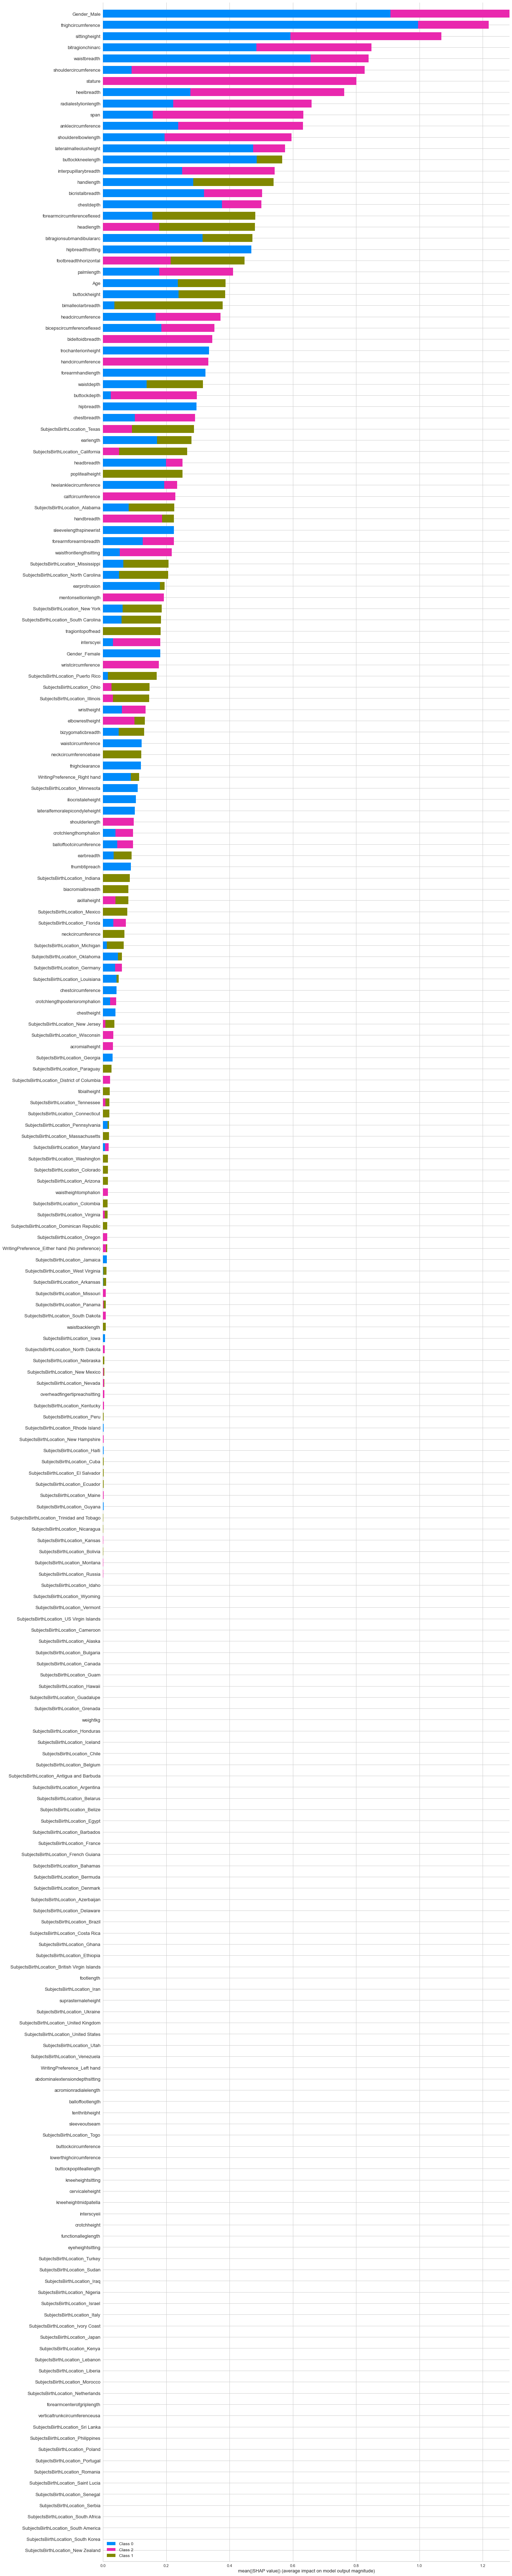

In [168]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100))

In [ ]:
# Hispanic class could not be detected among the first 13 strong features below. 
# In these features, White and Black are very well identified.
# Detection of Hispanics started after the 13th feature. 
# If we had normal feature importance instead of Shap and had chosen the strongest fratures, 
# the scores of the Hispanic class would have been very bad.

## SHAP for Feature Selection

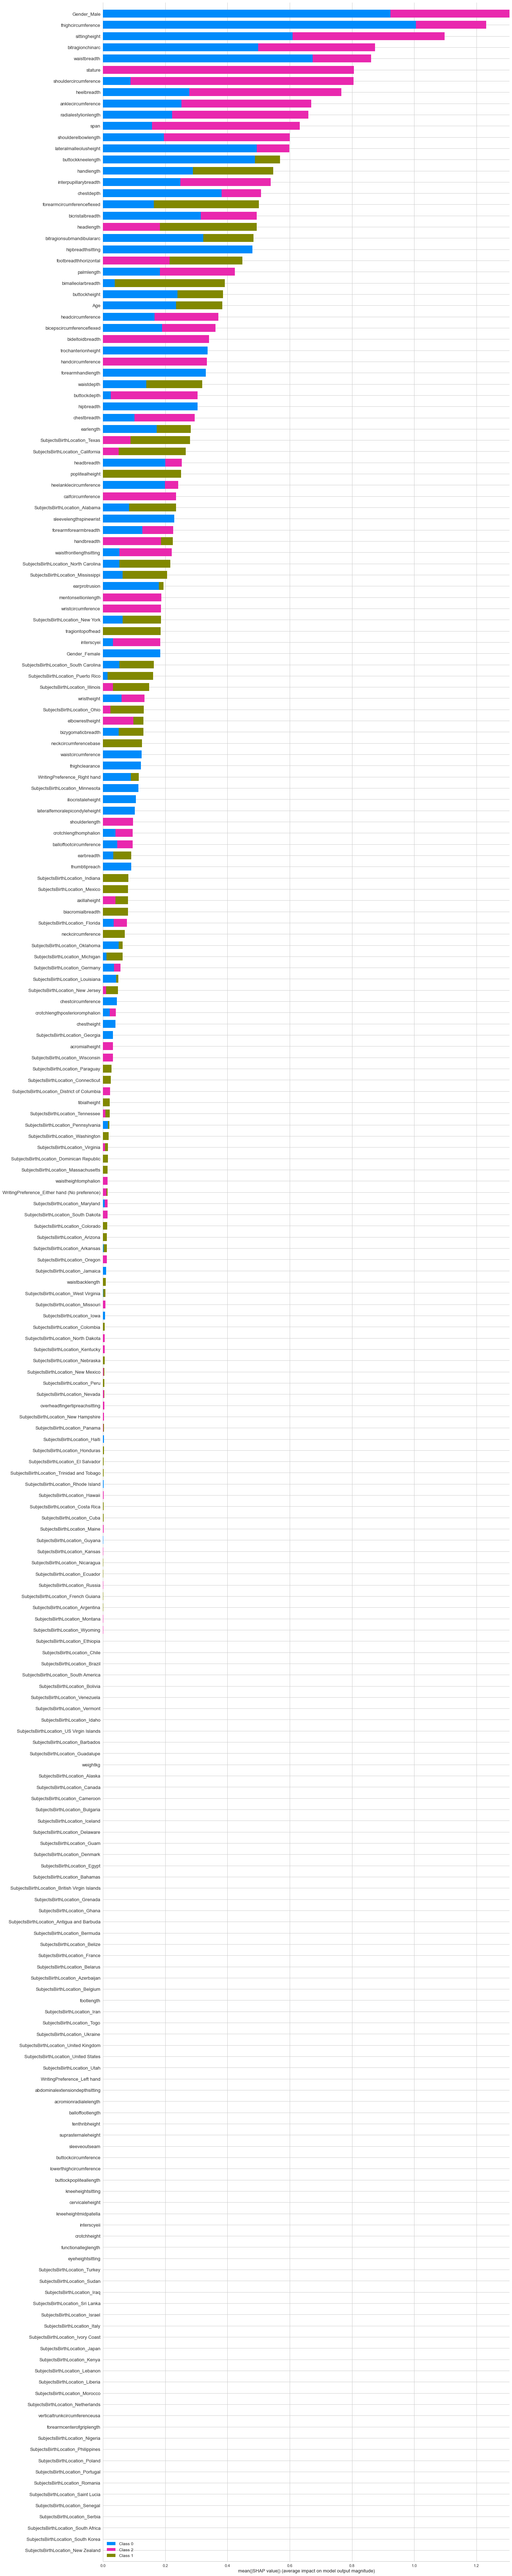

In [169]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = new_features, plot_size=(20,100))

In [ ]:
# Based on the chart above, we've compiled the following list of features 
# that have contributed the most to detecting Hispanics:

In [170]:
hispanic=["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
          'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 
          'tragiontopofhead','bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 
          'buttockkneelength', 'earlength', 'axillaheight', "Age"]

In [171]:
#X.columns

In [172]:
X2 = X[hispanic]
X2.head()

,SubjectsBirthLocation,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,WritingPreference,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,North Dakota,193,299,206,291,101,71,437,240,Right hand,140,493,436,401,882,619,71,1347,41
1,New York,195,289,201,320,98,67,417,225,Left hand,120,479,420,394,870,584,62,1293,35
2,New York,203,357,202,330,103,75,431,255,Left hand,125,544,434,427,901,623,61,1327,42
3,Wisconsin,194,318,199,309,106,73,393,205,Right hand,127,518,446,401,821,560,66,1239,31
4,North Carolina,218,324,197,310,111,80,523,214,Right hand,122,524,430,435,1080,706,56,1478,21


In [173]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [174]:
X2.shape

(5769, 19)

In [175]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [176]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=101, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [177]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[215  15  30]
 [  8 108  20]
 [ 93 129 536]]
              precision    recall  f1-score   support

       Black       0.68      0.83      0.75       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.71      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.78      0.70      1154
weighted avg       0.80      0.74      0.76      1154


Train_Set
[[ 878   47  113]
 [  31  441   71]
 [ 366  512 2156]]
              precision    recall  f1-score   support

       Black       0.69      0.85      0.76      1038
    Hispanic       0.44      0.81      0.57       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



In [ ]:
# In this model we established with Shap, the Hispanic recall score increased. 
# If we did feature selection with the classical method, we would get the most prominent features, 
# and our Hispanic scores would get worse.

In [178]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.421941
train_precision_Hispanic    0.443850
test_recall_Hispanic        0.762368
train_recall_Hispanic       0.812154
test_f1_Hispanic            0.542681
train_f1_Hispanic           0.573989
dtype: float64

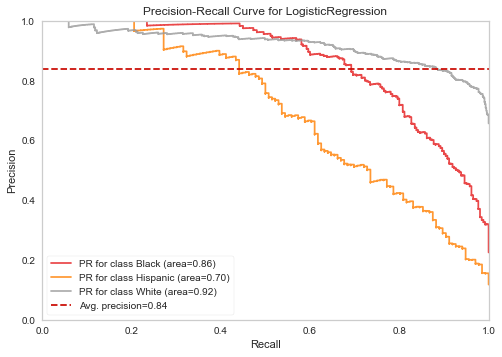

In [179]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

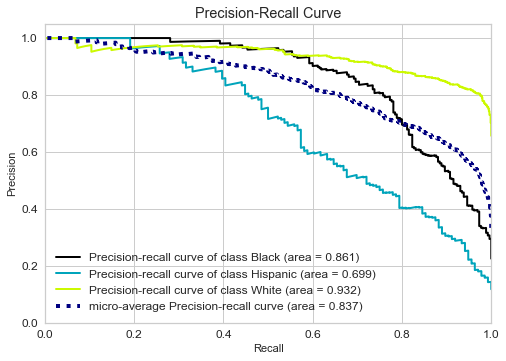

In [180]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
